**1.Problem statement**

"This is ipl data containg of two data sets , which one data set tells us about the venue,player of the match,batsman,bowler,toss,umpires and the other tells us about total runs,wickets stats from 2008-2020 . Here we try to give the oviewview of the batsman,bowler,toss decidions,venues and more."


**2.Importing packages**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**3.Loading Data**

In this EDA notebook we are using two datasets about Indian Premier League.



1.   **IPL matches dataset(dfm)**: This dataset contains information about the venues, players, umpires, toss decisions in 696 matches of IPL from 2008 - 2018.
2.   **IPL deliveries dataset(dfb)**: This dataset contains ball-by-ball information about 696 matches of IPL from 2008 - 2018.





In [36]:
#loading data
dfm = pd.read_csv('https://raw.githubusercontent.com/Saivinay63/IPL_DATA-ANALYSIS/main/IPL%20Matches%202008-2020.csv')
dfb = pd.read_csv('https://raw.githubusercontent.com/Saivinay63/IPL_DATA-ANALYSIS/main/IPL%20Ball-by-Ball%202008-2020.csv')

In [37]:
dfm.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


**Descriptionof the data set 1 matches**

In [38]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

info() function gives us the following insights :



1.   There are **816 rows** and **17 columns**
2.   In matches data set we have **1 float , 2 integer ,14 object datatype**
3.   There are missing values in **city,player_of_match,winner,result,result_margin,eliminator,method,**





**Description of the Dataset 2**


This dataset provides deliveries information in IPL till 2018. It gives ball by ball details of all matches in IPL along with total runs scored by each batsman, wickets taken by each bowler and extras provided in each match

In [39]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

info() function gives us the following insights into the deliveries dataframe:

1.   There are a total of **193468 rows** and **18 columns** in the dataframe.

2.   There are 9 columns with a numeric datatype and 9 columns with an object datatype.

3.   There are missing values in the **player_dismissed**, **dismissal_kind** and **fielder columns**,**fielder**,**extras_type**,**bowling_team**.

**Merge two tables**

In [40]:
merge_df=dfm.merge(dfb,how='left')
merge_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [41]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                193468 non-null  int64  
 1   city              190329 non-null  object 
 2   date              193468 non-null  object 
 3   player_of_match   193096 non-null  object 
 4   venue             193468 non-null  object 
 5   neutral_venue     193468 non-null  int64  
 6   team1             193468 non-null  object 
 7   team2             193468 non-null  object 
 8   toss_winner       193468 non-null  object 
 9   toss_decision     193468 non-null  object 
 10  winner            193096 non-null  object 
 11  result            193096 non-null  object 
 12  result_margin     189871 non-null  float64
 13  eliminator        193096 non-null  object 
 14  method            3208 non-null    object 
 15  umpire1           193468 non-null  object 
 16  umpire2           19

info() function gives us the following insights into the merge_df dataframe:

1.  There are a total of **193468 rows** and **37 columns** in the dataframe now.

2.  There are **11 columns** with a numeric datatype and **23 columns with an object datatype**.

3.   There are missing values in the **player_dismissed, dismissal_kind, fielder, city, winner, player_of_match and all umpire columns**.

**High Level View of the Data**

In [42]:
print(dfm.shape,"\n")
print(dfm.dtypes,"\n")

(816, 17) 

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object 



**Converting Date column data type from object to date**

In [43]:
dfm['date']=pd.to_datetime(dfm['date'])

In [44]:
#The nunique() method returns the number of unique values for each column.
dfm.nunique()

id                 816
city                32
date               596
player_of_match    233
venue               36
neutral_venue        2
team1               15
team2               15
toss_winner         15
toss_decision        2
winner              15
result               3
result_margin       91
eliminator           2
method               1
umpire1             48
umpire2             47
dtype: int64

**DISPLAY CITY TO VENUE**


In [45]:
dfm['venue'].value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

In [46]:
dfm.groupby(['city', 'venue']).first()

#location = dfm.groupby(['city', 'venue']).count()['Season'].reset_index()

id  \
city           venue                                                         
Abu Dhabi      Sheikh Zayed Stadium                                 729279   
Ahmedabad      Sardar Patel Stadium, Motera                         419111   
Bangalore      M Chinnaswamy Stadium                                335982   
Bengaluru      M.Chinnaswamy Stadium                               1082595   
Bloemfontein   OUTsurance Oval                                      392226   
Cape Town      Newlands                                             392181   
Centurion      SuperSport Park                                      392198   
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...   980905   
               Punjab Cricket Association Stadium, Mohali           335983   
Chennai        MA Chidambaram Stadium, Chepauk                      335989   
Cuttack        Barabati Stadium                                     419117   
Delhi          Feroz Shah Kotla                                     335984   
Dharamsala     Himachal Pradesh Cricket Association Stadium         419156   
Dubai          Dubai International Cricket Stadium                 1216493   
Durban         Kingsmead                                            392186   
East London    Buffalo Park                                         392203   
Hyderabad      Rajiv Gandhi International Stadium, Uppal            335988   
Indore         Holkar Cricket Stadium                               501254   
Jaipur         Sawai Mansingh Stadium                               335987   
Johannesburg   New Wanderers Stadium                                392206   
Kanpur         Green Park                                           981001   
Kimberley      De Beers Diamond Oval                                392216   
Kochi          Nehru Stadium                                        501200   
Kolkata        Eden Gardens                                         335986   
Mumbai         Brabourne Stadium                                    419107   
               Dr DY Patil Sports Academy                           335994   
               Wankhede Stadium                                     335985   
Nagpur         Vidarbha Cricket Association Stadium, Jamtha         419141   
Port Elizabeth St George's Park                                     392185   
Pune           Maharashtra Cricket Association Stadium              829709   
               Subrata Roy Sahara Stadium                           548313   
Raipur         Shaheed Veer Narayan Singh International Stadium     598035   
Rajkot         Saurashtra Cricket Association Stadium               980911   
Ranchi         JSCA International Stadium Complex                   598057   
Sharjah        Sharjah Cricket Stadium                             1216495   
Visakhapatnam  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...   548311   

                                                                        date  \
city           venue                                                           
Abu Dhabi      Sheikh Zayed Stadium                               2014-04-16   
Ahmedabad      Sardar Patel Stadium, Motera                       2010-03-15   
Bangalore      M Chinnaswamy Stadium                              2008-04-18   
Bengaluru      M.Chinnaswamy Stadium                              2017-04-08   
Bloemfontein   OUTsurance Oval                                    2009-05-15   
Cape Town      Newlands                                           2009-04-18   
Centurion      SuperSport Park                                    2009-04-28   
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M... 2016-04-11   
               Punjab Cricket Association Stadium, Mohali         2008-04-19   
Chennai        MA Chidambaram Stadium, Chepauk                    2008-04-23   
Cuttack        Barabati Stadium                                   2010-03-19   
Delhi          Feroz Shah Kotla                                   2

****If we consider city and venue there are more venues than cities so there are cities and venues with speling mistake
ex : 'Bengaluru' and 'Bengalore'****


In [47]:
#Updating Bangaluru to Bangalore
update1=dfm['city']=='Bengaluru'
dfm.loc[update1,'city']='Bangalore'

In [48]:

#updating M.Chinnaswamy Stadium to M Chinnaswamy Stadium
update2=dfm['venue']=='M.Chinnaswamy Stadium'
dfm.loc[update2,'venue']='M Chinnaswamy Stadium'

In [49]:
dfm['venue'].value_counts()

M Chinnaswamy Stadium                                   80
Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

In [50]:
#updating Punjab Cricket Association IS Bindra Stadium, Mohali to Punjab Cricket Association Stadium, Mohali
update3=dfm['venue']=='Punjab Cricket Association IS Bindra Stadium, Mohali'
dfm.loc[update3,'venue']='Punjab Cricket Association Stadium, Mohali'

In [51]:
#Updating nan values to sharjah
update4=dfm['venue']=='Sharjah Cricket Stadium'
dfm.loc[update4,'city']='Sharjah'

In [52]:
dfm.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [53]:
update5=dfm['venue']=='Dubai International Cricket Stadium'
dfm.loc[update5,'city']='Dubai'

**WINNING PERCENTAGE OF EVERY TEAM**

In [54]:
dfm.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [55]:
dfm.groupby('team1').count().id.reset_index()
dfm.groupby('team2').count().id.reset_index()

,team2,id
0,Chennai Super Kings,84
1,Deccan Chargers,36
2,Delhi Capitals,14
3,Delhi Daredevils,78
4,Gujarat Lions,14
5,Kings XI Punjab,98
6,Kochi Tuskers Kerala,7
7,Kolkata Knight Riders,97
8,Mumbai Indians,106
9,Pune Warriors,23


In [56]:
#UPDATING Rising Pune Supergiant TO Rising Pune Supergiants
update6=dfm['winner']=='Rising Pune Supergiant'
dfm.loc[update6,'winner']='Rising Pune Supergiants'

In [57]:
#UPDATING Rising Pune Supergiant TO Rising Pune Supergiants
update7=dfm['team1']=='Rising Pune Supergiant'
dfm.loc[update7,'team1']='Rising Pune Supergiants'

In [58]:
#UPDATING Rising Pune Supergiant TO Rising Pune Supergiants
update8=dfm['team2']=='Rising Pune Supergiant'
dfm.loc[update8,'team2']='Rising Pune Supergiants'

In [59]:
#https://www.geeksforgeeks.org/pandas-concat-function-in-python/

matches_played = pd.concat([dfm['team1'],dfm['team2']], axis=0)

In [60]:
matches_played = matches_played.value_counts().reset_index()
matches_played

,index,0
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


In [61]:
matches_played.columns=['Teams','Total number of matches']
matches_played

,Teams,Total number of matches
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


In [62]:

dfm['winner'].value_counts().reset_index()

,index,winner
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


In [63]:
matches_played['won_matches'] = dfm['winner'].value_counts().reset_index()['winner']
matches_played

,Teams,Total number of matches,won_matches
0,Mumbai Indians,203,120
1,Royal Challengers Bangalore,195,106
2,Kolkata Knight Riders,192,99
3,Kings XI Punjab,190,91
4,Chennai Super Kings,178,88
5,Delhi Daredevils,161,81
6,Rajasthan Royals,161,67
7,Sunrisers Hyderabad,124,66
8,Deccan Chargers,75,29
9,Pune Warriors,46,19


In [64]:
matches_played['Winning percentage']=(matches_played['won_matches']/matches_played['Total number of matches'])*100

In [65]:
matches_played

,Teams,Total number of matches,won_matches,Winning percentage
0,Mumbai Indians,203,120,59.113300
1,Royal Challengers Bangalore,195,106,54.358974
2,Kolkata Knight Riders,192,99,51.562500
3,Kings XI Punjab,190,91,47.894737
4,Chennai Super Kings,178,88,49.438202
5,Delhi Daredevils,161,81,50.310559
6,Rajasthan Royals,161,67,41.614907
7,Sunrisers Hyderabad,124,66,53.225806
8,Deccan Chargers,75,29,38.666667
9,Pune Warriors,46,19,41.304348


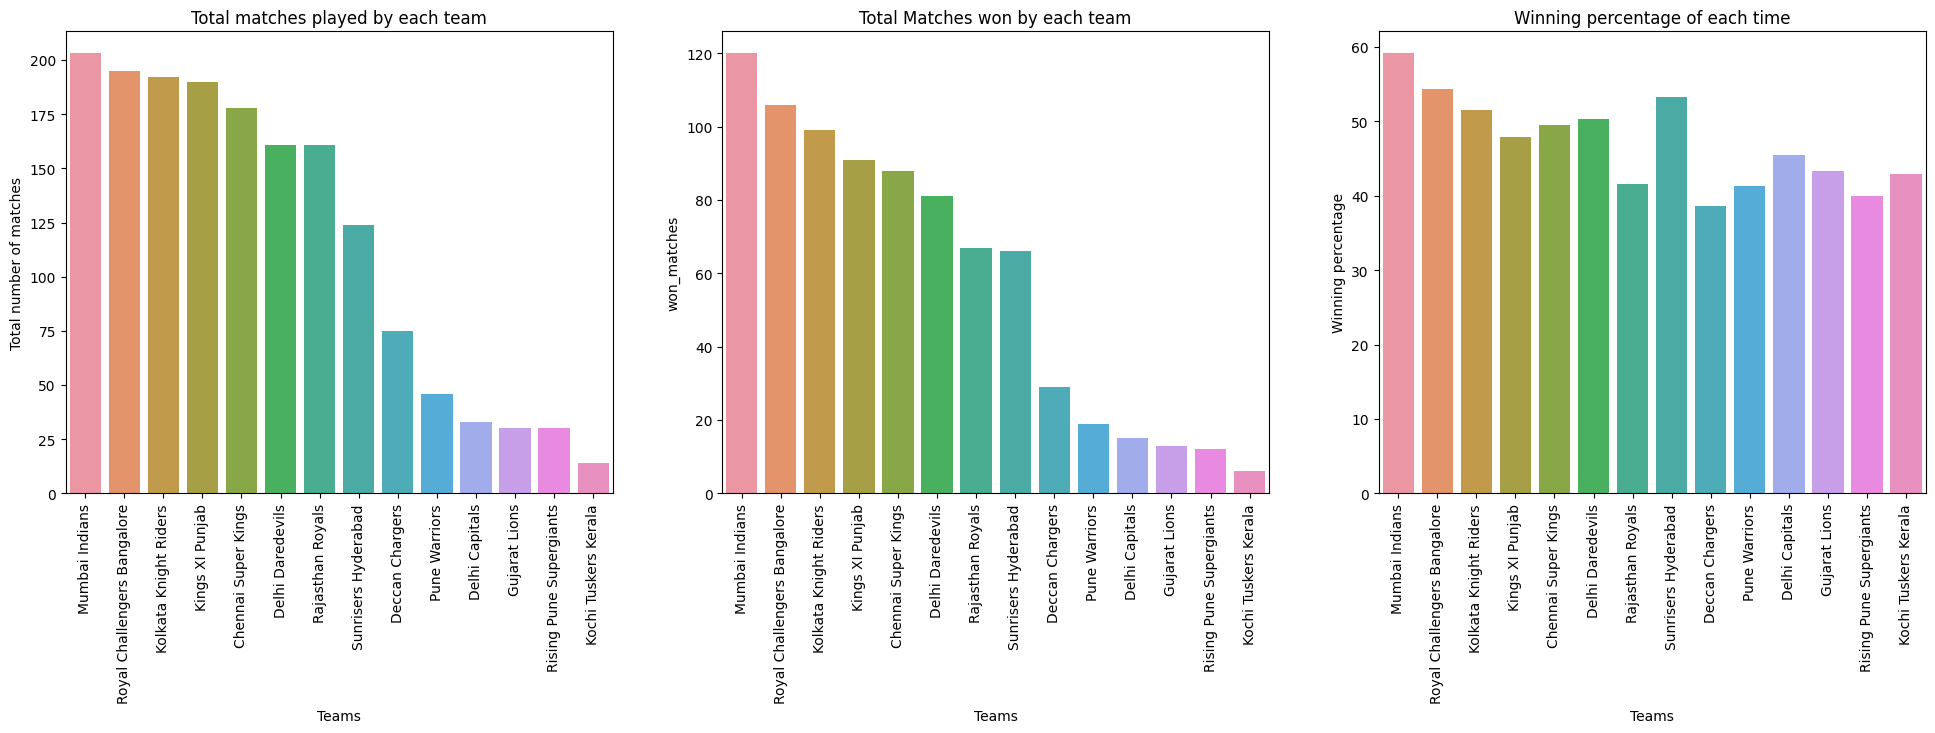

In [66]:

plt.figure(figsize=(24,6))
plt.subplot(131)
sns.barplot(x=matches_played['Teams'],y=matches_played['Total number of matches']).set_xticklabels(matches_played['Teams'],rotation=90)
plt.title('Total matches played by each team')


plt.subplot(132)
sns.barplot(x=matches_played['Teams'],y=matches_played['won_matches']).set_xticklabels(matches_played['Teams'],rotation=90)
plt.title('Total Matches won by each team')

plt.subplot(133)
sns.barplot(x=matches_played['Teams'],y=matches_played['Winning percentage']).set_xticklabels(matches_played['Teams'],rotation=90)
plt.title('Winning percentage of each time')

plt.show()

WHICH STADIUM HOST MAXIMUM MATCHES

In [67]:
grounds=dfm['venue'].value_counts().reset_index()
grounds.columns=['Venue','No of matches']
grounds

,Venue,No of matches
0,M Chinnaswamy Stadium,80
1,Eden Gardens,77
2,Feroz Shah Kotla,74
3,Wankhede Stadium,73
4,"Rajiv Gandhi International Stadium, Uppal",64
5,"MA Chidambaram Stadium, Chepauk",57
6,"Punjab Cricket Association Stadium, Mohali",56
7,Sawai Mansingh Stadium,47
8,Dubai International Cricket Stadium,33
9,Sheikh Zayed Stadium,29


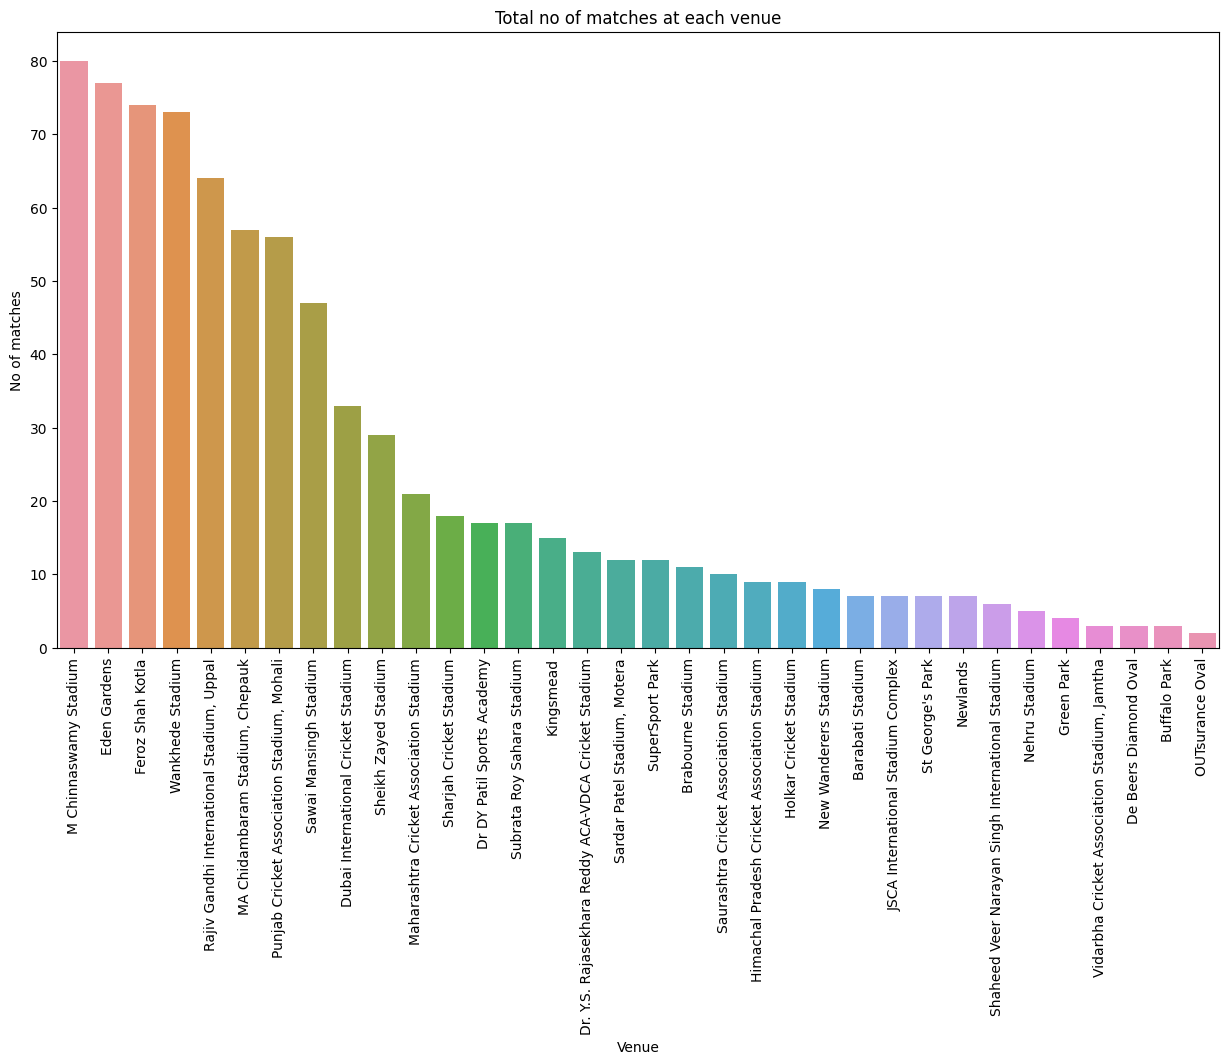

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(x=grounds['Venue'],y=grounds['No of matches']).set_xticklabels(grounds['Venue'],rotation=90)
plt.title('Total no of matches at each venue')
plt.show()

**We can say that M Chinnaswamy Stadium	hosted the maximum matches**

**HOW TOSS EFFECTS THE RESULT OF THE MATCH**

In [69]:
dfm.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [70]:
dfm['Season']=dfm['date'].dt.year
dfm.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [71]:
dfm['toss_effect']=(dfm['toss_winner']==dfm['winner'])
dfm.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_effect
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,False
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,True
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,False
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,False
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,False


In [72]:
win=dfm.groupby('Season')['toss_effect'].sum()
total_matches_per_season=dfm.groupby('Season').count()['id']
total_winner_ratio=np.round((win/total_matches_per_season)*100,decimals=1).reset_index()
total_winner_ratio.columns=['Season','Percentage']

In [73]:
total_winner_ratio


,Season,Percentage
0,2008,48.3
1,2009,57.9
2,2010,51.7
3,2011,52.1
4,2012,44.6
5,2013,47.4
6,2014,50.0
7,2015,47.5
8,2016,56.7
9,2017,49.2


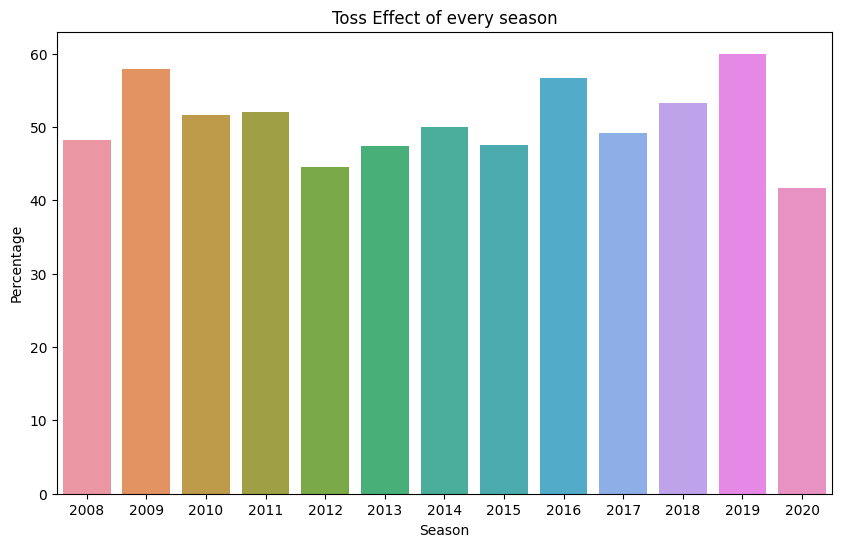

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(x=total_winner_ratio['Season'],y=total_winner_ratio['Percentage'])
plt.title('Toss Effect of every season')

plt.show()

**Performance of a team after winning toss**

In [75]:
dfm.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_effect
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,False
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,True
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,False
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,False
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,False


In [76]:
dfm['toss_win_match_win']=dfm['toss_winner'] == dfm['winner']

In [77]:
match_win=dfm.groupby('toss_winner')['toss_win_match_win'].sum()

In [78]:
total_toss_won=dfm.groupby('toss_winner').count()['id']

In [79]:
#updating Rising Pune Supergiant to Rising Pune Supergiants in toss_winner column
update9=dfm['toss_winner']=='Rising Pune Supergiant'
dfm.loc[update9,'toss_winner']='Rising Pune Supergiants'

In [80]:
total_winning_ratio=np.round((match_win/total_toss_won)*100,decimals=1).reset_index()
total_winning_ratio.columns=['Team','Percentage']
total_winning_ratio

,Team,Percentage
0,Chennai Super Kings,62.9
1,Deccan Chargers,44.2
2,Delhi Capitals,50.0
3,Delhi Daredevils,43.8
4,Gujarat Lions,66.7
5,Kings XI Punjab,42.4
6,Kochi Tuskers Kerala,50.0
7,Kolkata Knight Riders,56.1
8,Mumbai Indians,57.5
9,Pune Warriors,15.0


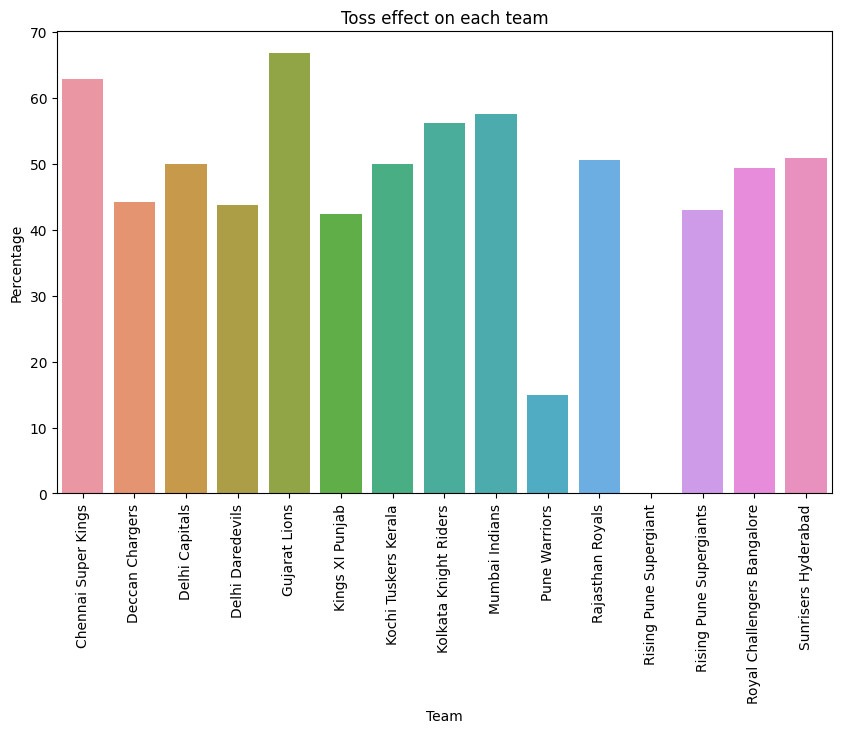

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x=total_winning_ratio['Team'],y=total_winning_ratio['Percentage']).set_xticklabels(total_winning_ratio['Team'],rotation=90)
plt.title('Toss effect on each team')
plt.show()

**In which IPL Season maximum no. of runs are scored?**

In [82]:
dfb.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [83]:
runs=dfm.merge(dfb,how='left')

In [84]:
total_runs_season=runs.groupby('Season')['total_runs'].sum().reset_index()
total_runs_season['total_runs']

0     17937
1     16320
2     18864
3     21154
4     22453
5     22541
6     18909
7     18332
8     18862
9     18769
10    19901
11    19400
12    19352
Name: total_runs, dtype: int64

In [85]:
total_matches=dfm.groupby('Season')['id'].count().reset_index()
total_matches.rename(columns={'id':'matches'},inplace=True)
total_matches

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [86]:
total_matches['runs_season']=total_runs_season['total_runs']
total_matches

,Season,matches,runs_season
0,2008,58,17937
1,2009,57,16320
2,2010,60,18864
3,2011,73,21154
4,2012,74,22453
5,2013,76,22541
6,2014,60,18909
7,2015,59,18332
8,2016,60,18862
9,2017,59,18769


In [87]:
total_matches['average_runs_season']=(total_matches['runs_season']/total_matches['matches'])
total_matches.sort_values('runs_season',ascending = False)

,Season,matches,runs_season,average_runs_season
5,2013,76,22541,296.592105
4,2012,74,22453,303.418919
3,2011,73,21154,289.780822
10,2018,60,19901,331.683333
11,2019,60,19400,323.333333
12,2020,60,19352,322.533333
6,2014,60,18909,315.150000
2,2010,60,18864,314.400000
8,2016,60,18862,314.366667
9,2017,59,18769,318.118644


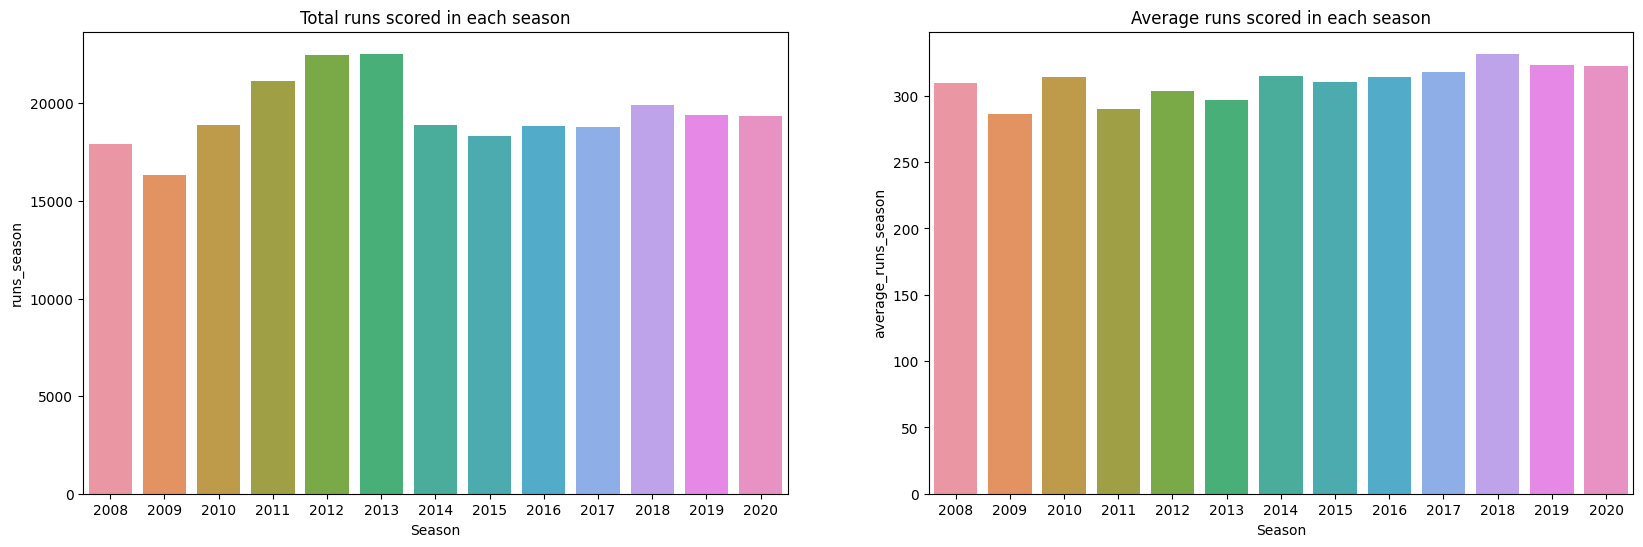

In [88]:
plt.figure(figsize=(20,6))

plt.figure(1)
plt.subplot(121)
sns.barplot(x=total_matches['Season'],y=total_matches['runs_season'])
plt.title('Total runs scored in each season')

plt.subplot(122)
sns.barplot(x=total_matches['Season'],y=total_matches['average_runs_season'])
plt.title('Average runs scored in each season')

plt.show()

**We can say that 2013 season has maximum runs with an average of 296 runs per match**

In [89]:
dfm.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season,toss_effect,toss_win_match_win
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,False,False
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,True,True
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,False,False
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,False,False
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,False,False


In [90]:
dfm.loc[dfm['winner'].isna(),'winner']='No_winner'

In [91]:
dfm.loc[dfm['result'].isna(),'result']='No_result'

In [92]:
dfm.loc[dfm['result_margin'].isna(),'result_margin']='No_margin'

In [93]:
dfb.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


**Most runs in ipl**

In [94]:
total_individual_runs=dfb.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index()
total_individual_runs[:10]

,batsman,batsman_runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


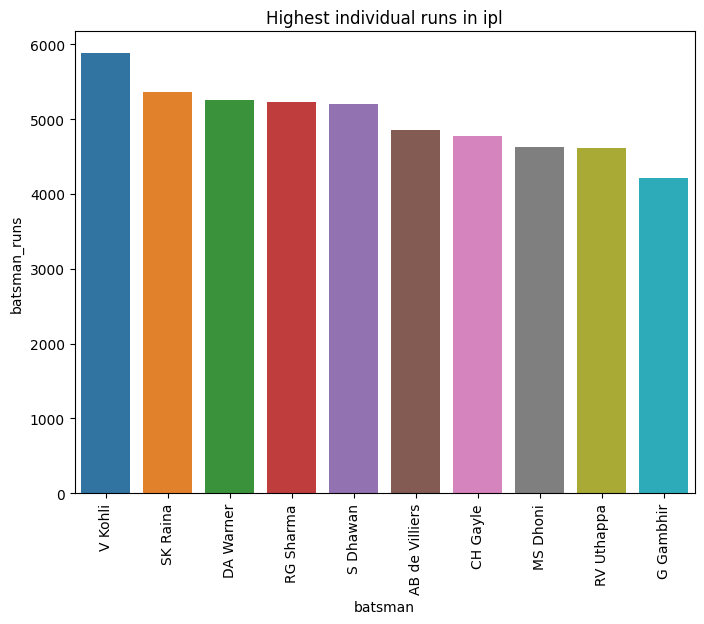

In [95]:
plt.figure(figsize = (8,6))
sns.barplot(x=total_individual_runs['batsman'][:10],y=total_individual_runs['batsman_runs'][:10]).set_xticklabels(total_individual_runs['batsman'][:10],rotation=90)
plt.title('Highest individual runs in ipl')
plt.show()

**Highest score in ipl**

In [96]:
highest_individual_runs=dfb.groupby(['id','batsman'])['batsman_runs'].sum().sort_values(ascending = False).reset_index()
highest_individual_runs.drop('id',axis=1,inplace=True)
highest_individual_runs[:10]

,batsman,batsman_runs
0,CH Gayle,175
1,BB McCullum,158
2,AB de Villiers,133
3,KL Rahul,132
4,AB de Villiers,129
5,CH Gayle,128
6,RR Pant,128
7,M Vijay,127
8,DA Warner,126
9,V Sehwag,122


In [97]:
runs.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


**Most wickets in ipl**




In [98]:
most_wickets=runs.groupby(['Season','bowler'])['is_wicket'].sum().reset_index()
most_wickets.groupby('bowler')['is_wicket'].sum().sort_values(ascending=False)[:10].reset_index()

,bowler,is_wicket
0,SL Malinga,188
1,DJ Bravo,175
2,A Mishra,169
3,PP Chawla,164
4,Harbhajan Singh,161
5,R Ashwin,153
6,B Kumar,146
7,SP Narine,143
8,UT Yadav,137
9,R Vinay Kumar,127


**Each season purple cap**

In [99]:
most_wickets=runs.groupby(['Season','bowler'])['is_wicket'].sum().reset_index()
wickets = most_wickets.groupby('Season')['is_wicket'].max().reset_index()
most_wickets

,Season,bowler,is_wicket
0,2008,A Kumble,8
1,2008,A Mishra,11
2,2008,A Nehra,14
3,2008,A Nel,1
4,2008,A Symonds,0
...,...,...,...
1434,2020,UT Yadav,1
1435,2020,V Shankar,4
1436,2020,VR Aaron,0
1437,2020,Washington Sundar,9
